In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/블록체인

/content/gdrive/My Drive/블록체인


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
Train = pd.read_csv('./Data/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv')
Test = pd.read_csv('./Data/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv')

In [ ]:
feature10 = ['pkSeqID', 'seq', 'mean', 'stddev', 'min', 'max', 'srate', 'drate', 'N_IN_Conn_P_SrcIP', 'N_IN_Conn_P_DstIP', 'category']

In [ ]:
Train = Train[feature10]
Test = Test[feature10]

In [ ]:
Train.shape

(2934817, 11)

In [ ]:
Test.shape

(733705, 11)

In [ ]:
pd.value_counts(Train['category'])

DDoS              1541315
DoS               1320148
Reconnaissance      72919
Normal                370
Theft                  65
Name: category, dtype: int64

# Sampling

In [ ]:
nsample = int(Train.shape[0]*0.02) # 2%

In [ ]:
nsample

58696

In [ ]:
Train1 = Train[(Train['category'] == 'DoS') | (Train['category'] == 'DDoS') | (Train['category'] == 'Reconnaissance')]
Test1 = Test[(Test['category'] == 'DoS') | (Test['category'] == 'DDoS') | (Test['category'] == 'Reconnaissance')]

In [ ]:
from sklearn.model_selection import train_test_split
_, Train001 = train_test_split(Train1, test_size=nsample, shuffle=True, random_state=1004)

In [ ]:
pd.value_counts(Train001['category'])

DDoS              31084
DoS               26154
Reconnaissance     1458
Name: category, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
_, Test001 = train_test_split(Test1, test_size=nsample, shuffle=True, random_state=1004)

In [ ]:
pd.value_counts(Test001['category'])

DDoS              30836
DoS               26409
Reconnaissance     1451
Name: category, dtype: int64

# Train Sampling

- Dos, DDos, Reconnaissance Sampling

In [ ]:
Train2 = Train[(Train['category'] == 'Normal') | (Train['category'] == 'Theft')]

In [ ]:
Train001 = pd.concat([Train001, Train2], axis=0)

In [ ]:
pd.value_counts(Train001['category'])

DDoS              31084
DoS               26154
Reconnaissance     1458
Normal              370
Theft                65
Name: category, dtype: int64

In [ ]:
# Train001.to_csv('./Data/Train001.csv', index = False)

# Test Sampling
- Dos, DDos, Reconnaissance Sampling

In [ ]:
Test2 = Test[(Test['category'] == 'Normal') | (Test['category'] == 'Theft')]

In [ ]:
Test001 = pd.concat([Test001, Test2], axis=0)

In [ ]:
pd.value_counts(Test001['category'])

DDoS              30836
DoS               26409
Reconnaissance     1451
Normal              107
Theft                14
Name: category, dtype: int64

In [ ]:
# Test001.to_csv('./Data/Test001.csv', index = False)


<br>
<br>
<br>
<br>
<br>
<br>
<br>



# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Train001 = pd.read_csv('./Data/Train001.csv')
Test001 = pd.read_csv('./Data/Test001.csv')

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = 'Train Bot-IoT Data' # df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

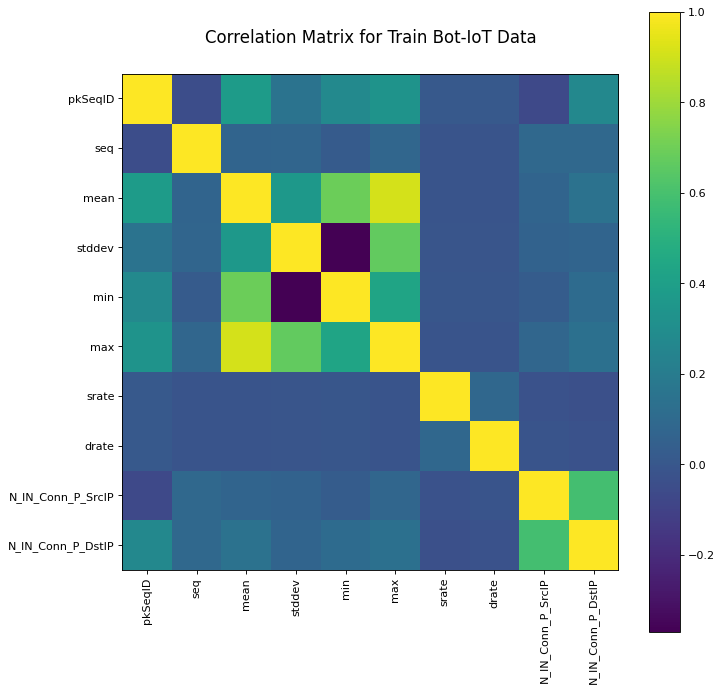

In [ ]:
plotCorrelationMatrix(Train001, 10)

In [ ]:
Train001

,pkSeqID,seq,mean,stddev,min,max,srate,drate,N_IN_Conn_P_SrcIP,N_IN_Conn_P_DstIP,category
0,609770,83989,0.144175,0.017855,0.125450,0.168208,0.100545,0.040218,81,81,DoS
1,3655606,32480,0.000107,0.000000,0.000107,0.000107,0.000000,0.000000,18,72,Reconnaissance
2,1200105,58516,3.695580,0.144745,3.564704,3.940660,0.217080,0.000000,100,100,DoS
3,1176904,35315,3.489655,1.715626,0.000000,4.866077,0.459007,0.000000,24,24,DoS
4,1861833,210592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100,100,DDoS
...,...,...,...,...,...,...,...,...,...,...,...
59126,3577016,3793,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,3,Normal
59127,3577117,16848,0.161776,0.323125,0.000000,0.808025,0.644334,0.555538,7,4,Normal
59128,3577246,23414,0.007598,0.000000,0.007598,0.007598,0.000000,0.000000,20,15,Normal
59129,3668518,81,0.013165,0.000000,0.013165,0.013165,151.917969,151.917969,19,19,Theft


In [ ]:
cols = list(Train001.columns)[0:10]

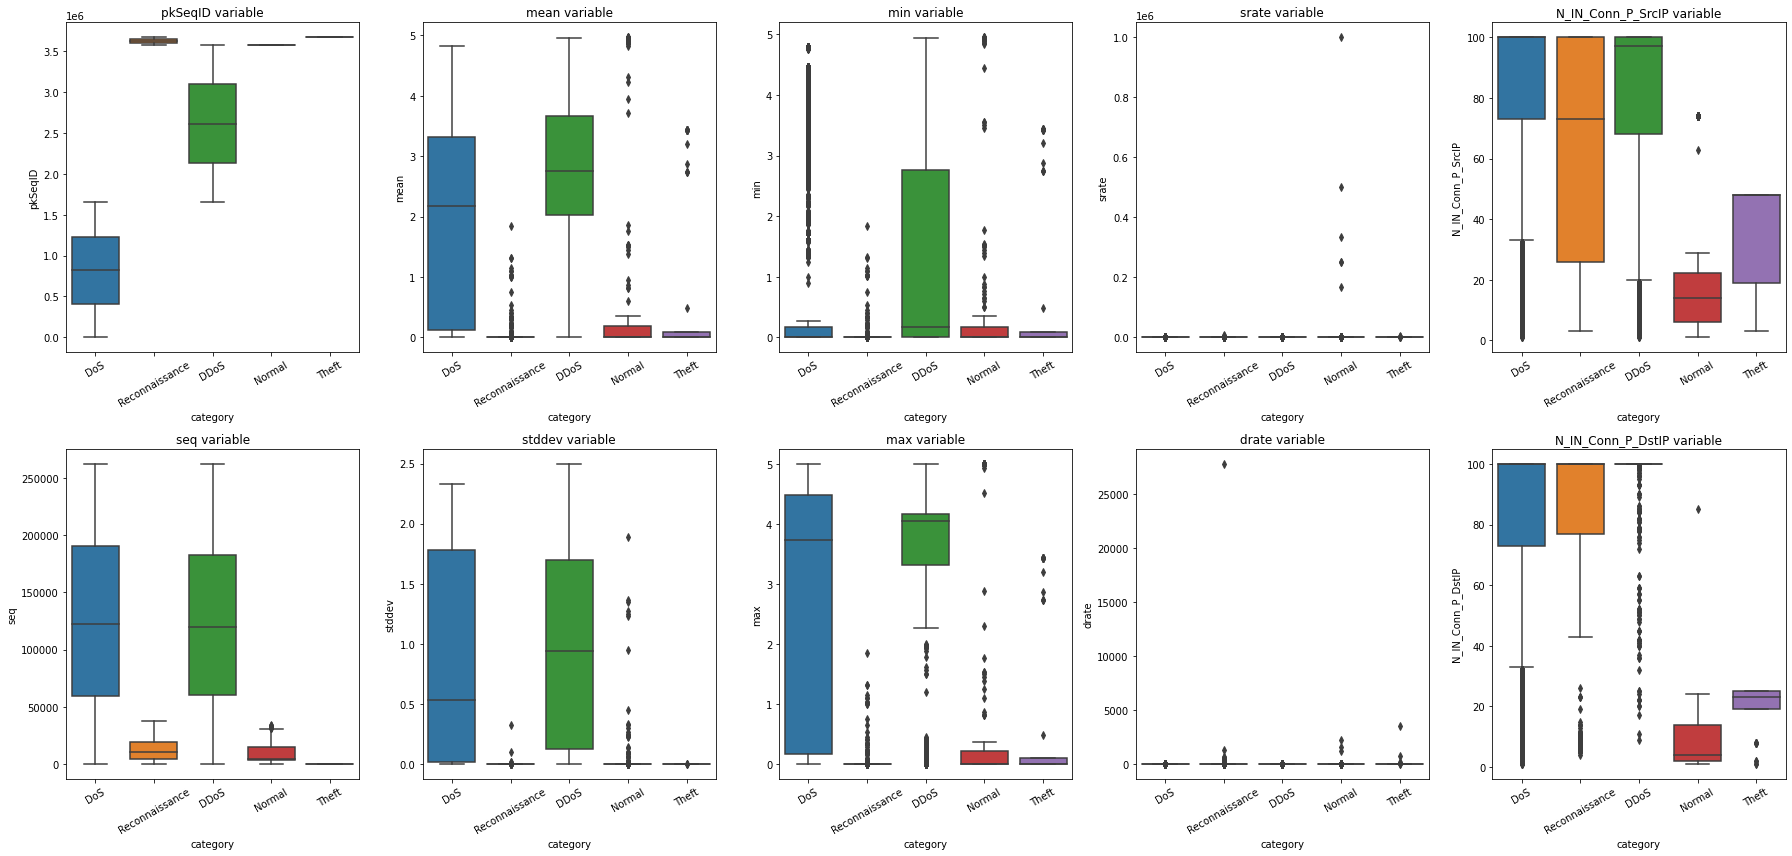

In [ ]:
# Grouped boxplots by seaborn
N = len(cols)
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(25,12))

for i in range(N):
    sns.boxplot(x="category",
                y=cols[i],
                data=Train001,
                ax=axs[i%2, i//2]).set_title(cols[i] + ' variable')
    
    ax = axs[i%2, i//2]
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

fig.tight_layout()
plt.show()